# **MACHINE LEARNING ASSIGNMENT**

For this assignment seed dataset is taken which generally fits the criteria. Criteria states that there should be minimum 1000 samples. This dataset is taken from the kaggle which comes under the classification problems.

The data in the dataset was extracted from two kinds of rice-(Gonen, Jasmine)
Data columns (total 12 columns):

RangeIndex: 18185 entries with the attributes:

1. id                                                     
2. Area                                             
3. MajorAxisLength                                  
4. MinorAxisLength                                
5. Eccentricity                                     
6. ConvexArea                                         
7. EquivDiameter                                      
8. Extent                                              
9. Perimeter                                             
10. Roundness                                      
11. AspectRation                                        
12. Class 

In [1]:
# Libraries
from sklearn.metrics import confusion_matrix, classification_report,f1_score,roc_auc_score,plot_roc_curve,roc_curve,plot_confusion_matrix,log_loss,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization,Dropout,Flatten
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from keras.optimizers import Adam,RMSprop
from keras.utils import np_utils
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
import numpy as np
import missingno as msno

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/task4/Rice-Gonen andJasmine.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine




*   There are total 12 columns in number but if we look at column 1st it is basically representing the unique id which doesn't worth anything in the model. In other words this column is not having any dependency on the target feature.



In [4]:
# Dropping unnecessary column id 
df.drop('id',axis=1,inplace=True) # Here inplace true helps to make changes in the original dataframe. 
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine


In [5]:
# Samples & Attributes
print("Number of samples : ", df.shape[0])
print("Number of attributes : ", df.shape[1])

Number of samples :  18185
Number of attributes :  11


In [6]:
# Checking the presence of null values 
df.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64



*   Many a times our dataset carries many null values with it, so it is necessary to look for those null values. Null values are needed to be replaced by some other values such as mean, median, and mode. The criteria that must be in mind is if there are more than 49% of the total samples null values are present then that column must be dropped.



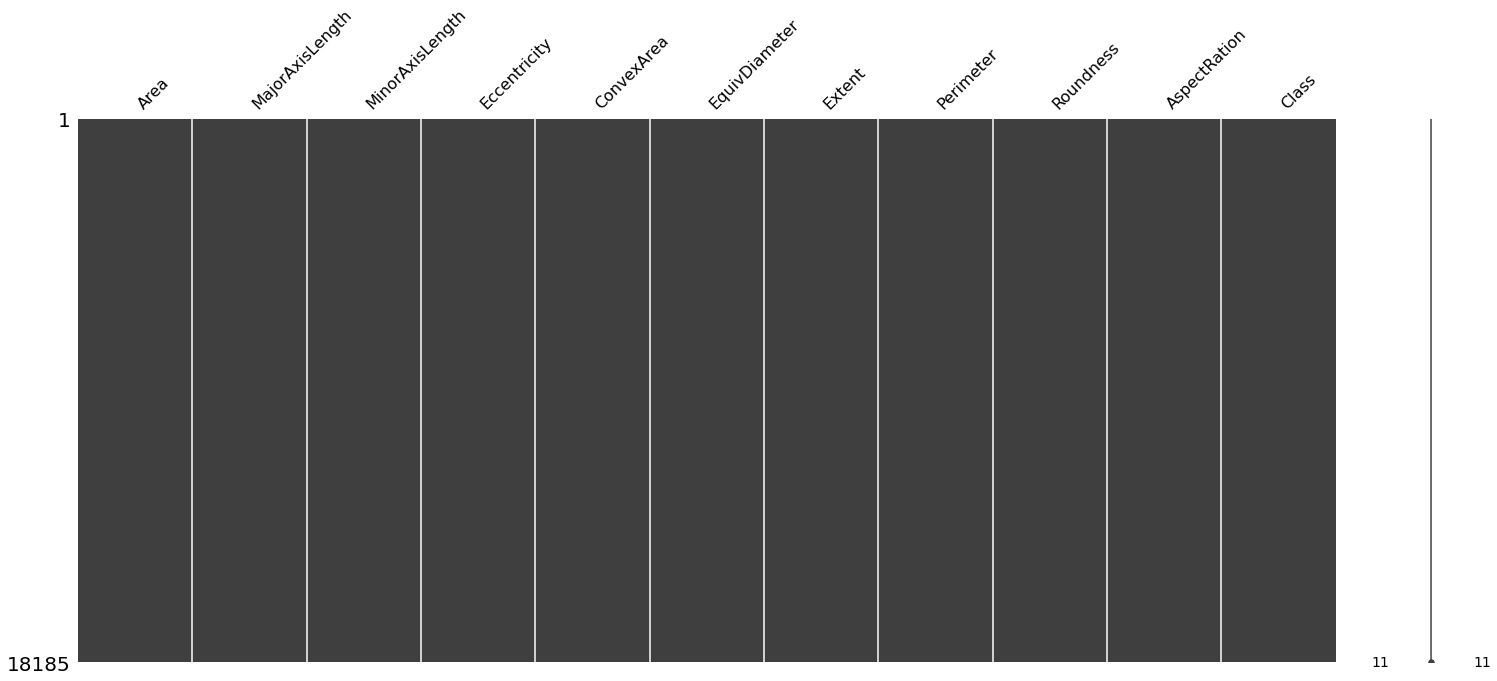

In [7]:
# Plotting the null values if any
msno.matrix(df)



*   ENCODE THE DATA



In [8]:
df.Class.unique()

array(['jasmine', 'Gonen'], dtype=object)

In [9]:
pd.DataFrame(df.Class).value_counts()

Class  
jasmine    9985
Gonen      8200
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df.Class = encode.fit_transform(df.Class)
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


After encoding,

0 is assigned to Gonen type of rice seed and                                  
1 is assigned to Jasmine type of rice seed

# DATA VISUALIZATION

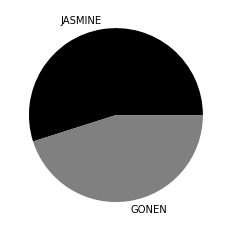

In [11]:
# Pie chart of the class level
plt.pie(df.Class.value_counts(), labels = ['JASMINE', 'GONEN'], colors=['black', 'grey'],)
plt.show()

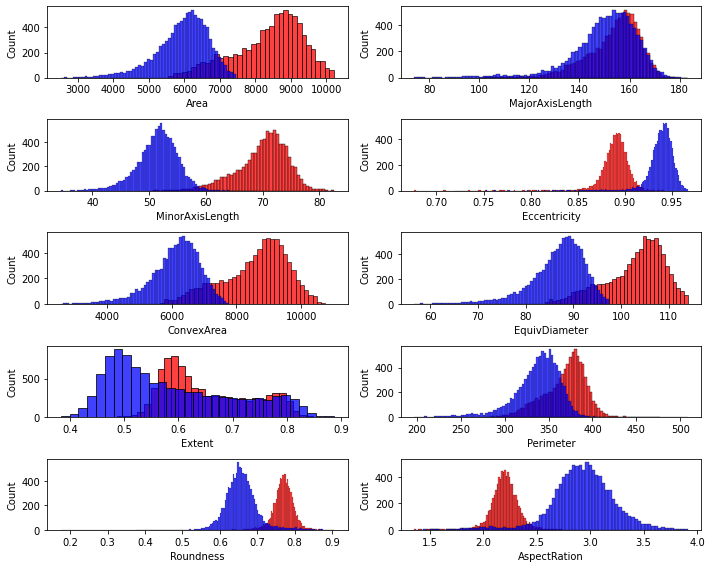

In [12]:
# Histograms of alll the columns in the dataset
n_rows=5
n_cols=2

# Create the subplots
#fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = (12,10))
plt.figure(figsize = (10,8))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(n_rows,n_cols,i+1)
    sns.histplot(df[df.Class==0][column],color='r')#,ax=axes[i//n_cols,i%n_cols]
    sns.histplot(df[df.Class==1][column],color='b')
plt.tight_layout()
plt.show()

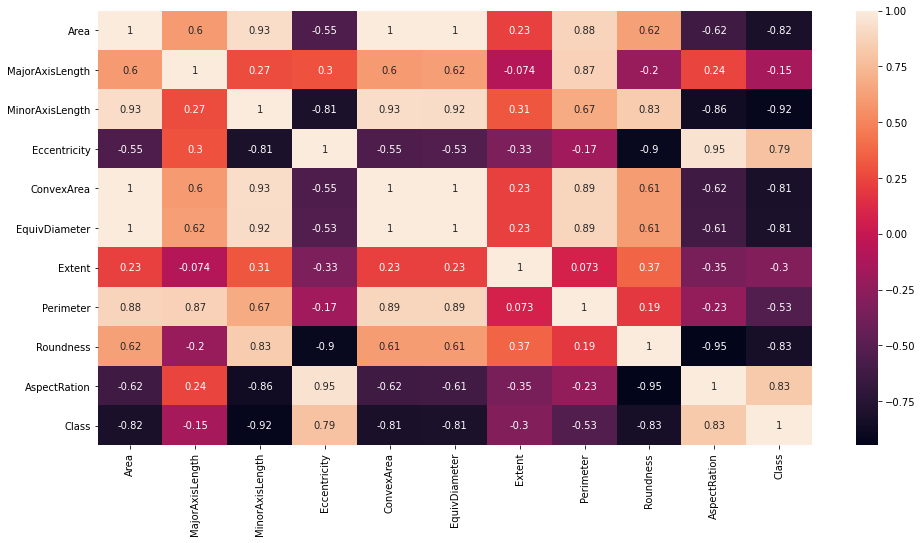

In [13]:
# Heatmap of the correlation matrix
fig, axes = plt.subplots(1,1, figsize = (16,8))
sns.heatmap(df.corr(), annot=True,ax = axes)

In [14]:
# Describing all the important detail that one must aware of
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,18185.0,7036.492989,1467.197150,2522.000000,5962.000000,6660.000000,8423.000000,10210.000000
MajorAxisLength,18185.0,151.680754,12.376402,74.133114,145.675910,153.883750,160.056214,183.211434
MinorAxisLength,18185.0,59.807851,10.061653,34.409894,51.393151,55.724288,70.156593,82.550762
Eccentricity,18185.0,0.915406,0.030575,0.676647,0.891617,0.923259,0.941372,0.966774
ConvexArea,18185.0,7225.817872,1502.006571,2579.000000,6125.000000,6843.000000,8645.000000,11008.000000
EquivDiameter,18185.0,94.132952,9.906250,56.666658,87.126656,92.085696,103.559146,114.016559
Extent,18185.0,0.616653,0.104389,0.383239,0.538530,0.601194,0.695664,0.886573
Perimeter,18185.0,351.606949,29.500620,197.015000,333.990000,353.088000,373.003000,508.511000
Roundness,18185.0,0.707998,0.067310,0.174590,0.650962,0.701941,0.769280,0.904748
AspectRation,18185.0,2.599081,0.434836,1.358128,2.208527,2.602966,2.964101,3.911845


In [15]:
# Information which helps you to identify the type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


In [16]:
#Seperating the label column
X = df.drop('Class', axis =1)
y = df.Class



*   Split data into train & test



In [17]:
#Split into test and train
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)



*   Applying feature reduction technique(PRINCIPLE COMPONENT ANALYSIS)

It is a technique that reduces the dimensions but does not let the data value lost.



In [18]:
pca = PCA(9)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

(14548, 9)

# START PREPARING THE MODELS

# 1. LOGISTIC REGRESSION MODEL

In [19]:
#Logistic Regression
logistic = LogisticRegression()

Tuning the parameters makes the code more flexible.

In [20]:
# All the parameters that are possible is taken into consideration
parameter = {
    'penalty' : ['l1','l2','elasicnet','none'],
    'C' : np.linspace(0.5,2,12),
    'solver' : ['newton-cg','lbfgs','liblinear','sag','saga'],
    'max_iter' : np.linspace(50,200,4),
    'multi_class' : ['ovr','multinomial'],
    'l1_ratio' : np.linspace(0,1,10)
}

In [21]:
# Randomly tuning with best parameters
clf = RandomizedSearchCV(logistic, parameter, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [22]:
# Fitting the data to train better
model = clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


In [23]:
# Best parameters
model.best_estimator_.get_params()

{'C': 1.8636363636363635,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.5555555555555556,
 'max_iter': 200.0,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Above parameters are the best detected parameters via RandomSearchCV function that helps us to find the best paramete. We therefore train our model on these parameters to obtain better accuracy.

In [24]:
# Prediction
test_prediction = model.predict(X_test)
train_prediction = model.predict(X_train)



*   ACCURACY MEASURE AND PLOTTING



In [25]:
# Comparing the f1 score
print("f1 score at testing phase :",f1_score(y_test,test_prediction))
print("f1 score at training phase :",f1_score(y_train,train_prediction))
print("Accuracy :", accuracy_score(y_test,test_prediction))

f1 score at testing phase : 0.9889168765743073
f1 score at training phase : 0.9910157224856503
Accuracy : 0.9879021171295024


In [26]:
print("Log Loss :",log_loss(y_test,model.predict_proba(X_test)))

Log Loss : 0.0365870267967848


In [27]:
print("Roc Auc Score :",roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Roc Auc Score : 0.9988794201159183


      ---------------Plot of ROC Curve------------


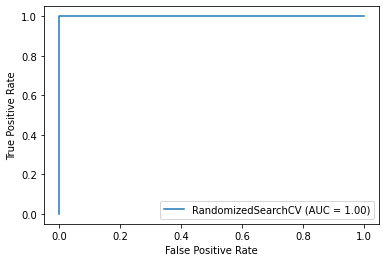

In [28]:
plot_roc_curve(model,X_test,test_prediction)
print("      ---------------Plot of ROC Curve------------")

In [29]:
# Classification Report
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1653
           1       0.99      0.99      0.99      1984

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637



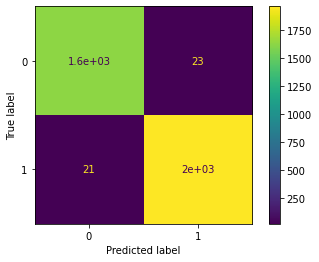

In [30]:
# Confusion Matrix
plot_confusion_matrix(model,X_test,y_test)

# 2. SUPPORT VECTOR MACHINE

In [31]:
#Support Vector Classifier
svc = SVC(probability=True)

Tuning the parameters makes the code more flexible

In [32]:
# All the parameters that are possible is taken into consideration
parameter = {
    'C' : np.linspace(0.5,2,12),
    'kernel' : ['rbf'],
    'gamma' : ['scale','auto'],
    'max_iter' : np.linspace(50,200,4),
}

In [33]:
# Randomly tuning with best parameters
clf2 = RandomizedSearchCV(svc, parameter, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)

In [34]:
# Fitting the data to train better
model2 = clf2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [35]:
# Fitting on the best parameters
model2.best_estimator_.get_params()

{'C': 0.5,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': 100.0,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [36]:
# Prediction
test_prediction = model2.predict(X_test)
train_prediction = model2.predict(X_train)



*   ACCURACY MEASURE AND PLOTTING


In [37]:
# Comparing the f1 score
print("f1 score at testing phase :",f1_score(y_test,test_prediction))
print("f1 score at training phase :",f1_score(y_train,train_prediction))
print("Accuracy :", accuracy_score(y_test,test_prediction))

f1 score at testing phase : 0.9071274298056157
f1 score at training phase : 0.9063519364213273
Accuracy : 0.8935936211163047


In [38]:
print("Log Loss :",log_loss(y_test,model2.predict_proba(X_test)))

Log Loss : 0.694268660388864


In [39]:
print("Roc Auc Score :",roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1]))

Roc Auc Score : 0.6332378629764065


      ---------------Plot of ROC Curve------------


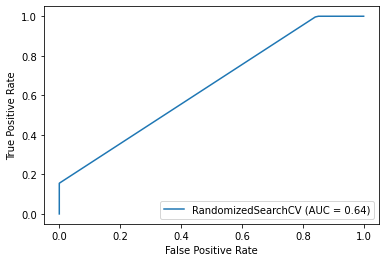

In [40]:
plot_roc_curve(model2,X_test,test_prediction)
print("      ---------------Plot of ROC Curve------------")

In [41]:
# Classification Report
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1653
           1       0.87      0.95      0.91      1984

    accuracy                           0.89      3637
   macro avg       0.90      0.89      0.89      3637
weighted avg       0.90      0.89      0.89      3637



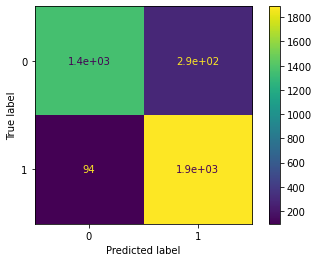

In [42]:
# Confusion Matrix
plot_confusion_matrix(model2,X_test,y_test)

In [43]:
X_train.shape

(14548, 9)

# 3. NEURAL NETWORK

In [44]:
# Defining the architecture

model3 = Sequential()
# Input Layer
model3.add(Dense(9, input_dim=9, activation='relu'))#, kernel_initializer='he_uniform'))
# First hidden layer
model3.add(Dense(64, activation='relu'))
# Second hidden layer
model3.add(Dense(128, activation='relu'))
# Output layer
model3.add(Dense(1, activation='sigmoid'))

opt = Adam(0.01)
model3.compile(metrics=['accuracy'],loss='binary_crossentropy', optimizer=opt)
trained_model = model3.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=10, verbose=1)

Epoch 1/10
455/455 [==============================] - 2s 4ms/step - loss: 7.9694 - accuracy: 0.9091 - val_loss: 0.1082 - val_accuracy: 0.9764
Epoch 2/10
455/455 [==============================] - 1s 3ms/step - loss: 0.0848 - accuracy: 0.9828 - val_loss: 0.0704 - val_accuracy: 0.9835
Epoch 3/10
455/455 [==============================] - 1s 3ms/step - loss: 0.0528 - accuracy: 0.9859 - val_loss: 0.0531 - val_accuracy: 0.9846
Epoch 4/10
455/455 [==============================] - 1s 3ms/step - loss: 0.1610 - accuracy: 0.9826 - val_loss: 0.1211 - val_accuracy: 0.9783
Epoch 5/10
455/455 [==============================] - 1s 2ms/step - loss: 0.0937 - accuracy: 0.9833 - val_loss: 0.1241 - val_accuracy: 0.9687
Epoch 6/10
455/455 [==============================] - 1s 3ms/step - loss: 0.1203 - accuracy: 0.9818 - val_loss: 0.2174 - val_accuracy: 0.9643
Epoch 7/10
455/455 [==============================] - 1s 3ms/step - loss: 0.0815 - accuracy: 0.9797 - val_loss: 0.0634 - val_accuracy: 0.9838
Epoch 

In [45]:
model3.save_weights('weights.p5')

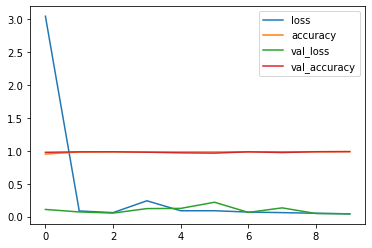

In [46]:
pd.DataFrame(trained_model.history).plot()

# CONCLUSION

After experimenting all the 3 algorithms required in the assignment, came up with the conclusion that accurasy of the models is

1. Logistic Regression: 0.99
2. Neural Network:      0.98
3. SVC:                 0.89

Hence, Logistic Regression and Neural network are the most prominent algorithms.